In [5]:
!pip install nengo-dl --user

  Using cached https://files.pythonhosted.org/packages/25/8c/d28cd70b6e0b870a2d2a151bdbecf4c678199d31731edb44fc8035d3bb6d/progressbar2-3.53.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/35/38/7c489e8ff80b652b9ae92d5d63416a0b742c089b3a284897802824ea06d4/nengo-3.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/47/974eb168d5012bc8841d4b5be10e345f3e706e25fa1661b68f193e16ca67/python_utils-2.5.6-py2.py3-none-any.whl


In [6]:
%matplotlib inline

from urllib.request import urlretrieve

import matplotlib.pyplot as plt
import nengo
import numpy as np
import tensorflow as tf

import nengo_dl

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [22]:
%config Completer.use_jedi = False

In [8]:
img_height = 256
img_width = 256

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './data/',
  validation_split=0.2,
  subset="training",
#   color_mode = 'grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './data/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32)


Found 803 files belonging to 2 classes.
Using 643 files for training.
Found 803 files belonging to 2 classes.
Using 160 files for validation.


In [30]:
class_names = train_ds.class_names

In [31]:
x_train, y_train = [], []
x_test, y_test = [], []
for images, labels in train_ds:
  x_train.append(images.numpy())
#   y_train.append(labels.numpy())
x_train = np.concatenate(x_train, axis = 0) 
# np.array(x_train).shape >> (232,432,288,3)

for images, labels in val_ds:
  x_test.append(images.numpy())
#   y_test.append(labels.numpy())
x_test = np.concatenate(x_test, axis = 0) 

y_train = np.concatenate([y for x, y in train_ds], axis=0)
y_test = np.concatenate([y for x, y in val_ds], axis=0)

In [32]:
x_train = tf.image.central_crop(x_train, 0.6)
x_test = tf.image.central_crop(x_test, 0.6)

In [33]:
x_train /=255.
x_test /=255.

In [38]:
x_train = x_train.numpy()
x_test = x_test.numpy()

In [39]:
x_train0 = x_train
y_train0 = y_train
x_test0 = x_test
y_test0 = y_test

In [41]:
x_train.shape

(643, 154, 154, 3)

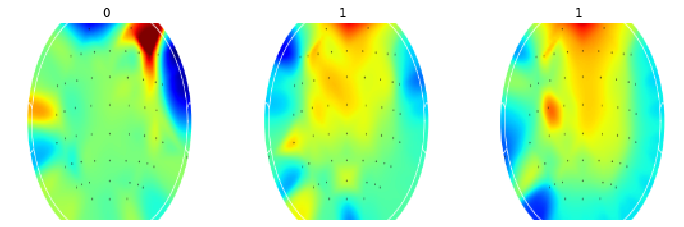

In [43]:
# flatten images and add time dimension
x_train = x_train.reshape((x_train.shape[0], 1, -1))
y_train = y_train.reshape((y_train.shape[0], 1, -1))
x_test = x_test.reshape((x_test.shape[0], 1, -1))
y_test = y_test.reshape((y_test.shape[0], 1, -1))

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(np.reshape(x_train[i], (154, 154,3)), cmap="gray")
    plt.axis("off")
    plt.title(str(y_train[i, 0, 0]))

In [44]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((643, 1, 71148), (160, 1, 71148), (643, 1, 1), (160, 1, 1))

In [60]:
# train_ds

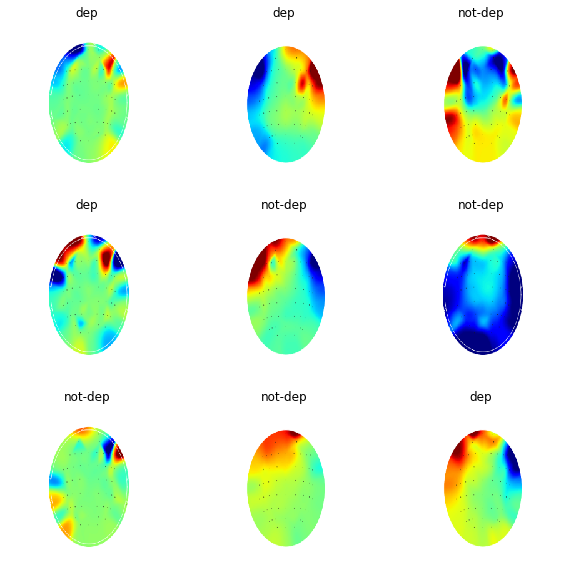

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [47]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 256, 256, 3)
(32,)


In [49]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [62]:
# input
inp = tf.keras.Input(shape=(154, 154, 3))

# convolutional layers
conv0 = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=3,
    activation=tf.nn.relu,
)(inp)

conv1 = tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=2,
    activation=tf.nn.relu,
)(conv0)

# fully connected layer
flatten = tf.keras.layers.Flatten()(conv1)
dense = tf.keras.layers.Dense(units=2)(flatten)

model = tf.keras.Model(inputs=inp, outputs=dense)

In [64]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [65]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 154, 154, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 152, 152, 32)      896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 360000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 720002    
Total params: 739,394
Trainable params: 739,394
Non-trainable params: 0
_________________________________________________________________


In [69]:
epochs=10
history = model.fit(
    x = x_train0,
    y= y_train0,
#   train_ds,
#   validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
21/21 [==============================] - 5s 256ms/step - loss: 0.6123 - accuracy: 0.6641
Epoch 2/10
21/21 [==============================] - 5s 256ms/step - loss: 0.6019 - accuracy: 0.6516
Epoch 3/10
21/21 [==============================] - 5s 253ms/step - loss: 0.5994 - accuracy: 0.6796
Epoch 4/10
21/21 [==============================] - 5s 254ms/step - loss: 0.5826 - accuracy: 0.7123
Epoch 5/10
21/21 [==============================] - 5s 256ms/step - loss: 0.5671 - accuracy: 0.6983
Epoch 6/10
21/21 [==============================] - 5s 254ms/step - loss: 0.5468 - accuracy: 0.7201
Epoch 7/10
21/21 [==============================] - 5s 252ms/step - loss: 0.5314 - accuracy: 0.7263
Epoch 8/10
21/21 [==============================] - 5s 253ms/step - loss: 0.5356 - accuracy: 0.7263
Epoch 9/10
21/21 [==============================] - 5s 252ms/step - loss: 0.5162 - accuracy: 0.7216
Epoch 10/10
21/21 [==============================] - 5s 253ms/step - loss: 0.5387 - accuracy: 0.7263

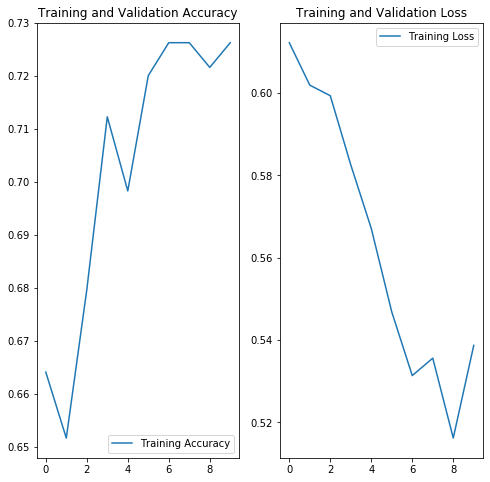

In [72]:
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [73]:
converter = nengo_dl.Converter(model)

In [74]:
do_training = True
if do_training:
    with nengo_dl.Simulator(converter.net, minibatch_size=50) as sim:
        # run training
        sim.compile(
            optimizer=tf.optimizers.Adam(0.001),
            loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=[tf.metrics.sparse_categorical_accuracy],
        )
        sim.fit(
            {converter.inputs[inp]: x_train},
            {converter.outputs[dense]: y_train},
            validation_data=(
                {converter.inputs[inp]: x_test},
                {converter.outputs[dense]: y_test},
            ),
            epochs=2,
        )

        # save the parameters to file
        sim.save_params("./keras_to_snn_params")
else:
    # download pretrained weights
    urlretrieve(
        "https://drive.google.com/uc?export=download&"
        "id=1lBkR968AQo__t8sMMeDYGTQpBJZIs2_T",
        "keras_to_snn_params.npz",
    )
    print("Loaded pretrained weights")



|                     Building network (0%)                    | ETA:  --:--:--

/home/p301217/.local/lib/python3.7/site-packages/nengo_dl/simulator.py:461: UserWarning: No GPU support detected. See https://www.nengo.ai/nengo-dl/installation.html#installing-tensorflow for instructions on setting up TensorFlow with GPU support.
  "No GPU support detected. See "


Build finished in 0:00:10                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:00                                               
Epoch 1/2
|############Constructing graph: pre-build stage (18%)           | ETA: 0:00:00

/home/p301217/.local/lib/python3.7/site-packages/nengo_dl/simulator.py:1922: UserWarning: Number of elements in input data (160) is not evenly divisible by Simulator.minibatch_size (50); input data will be truncated.
  f"Number of elements in input data ({data_batch}) is not "
/home/p301217/.local/lib/python3.7/site-packages/nengo_dl/simulator.py:1922: UserWarning: Number of elements in input data (643) is not evenly divisible by Simulator.minibatch_size (50); input data will be truncated.
  f"Number of elements in input data ({data_batch}) is not "


12/12 [==============================] - 136s 9s/step - loss: 0.5135 - probe_loss: 0.5135 - probe_sparse_categorical_accuracy: 0.7433 - val_loss: 0.9293 - val_probe_loss: 0.9293 - val_probe_sparse_categorical_accuracy: 0.5000
Epoch 2/2
12/12 [==============================] - 99s 8s/step - loss: 0.4749 - probe_loss: 0.4749 - probe_sparse_categorical_accuracy: 0.7633 - val_loss: 1.0061 - val_probe_loss: 1.0061 - val_probe_sparse_categorical_accuracy: 0.4867


In [75]:
def run_network(
    activation,
    params_file="keras_to_snn_params",
    n_steps=30,
    scale_firing_rates=1,
    synapse=None,
    n_test=400,
):
    # convert the keras model to a nengo network
    nengo_converter = nengo_dl.Converter(
        model,
        swap_activations={tf.nn.relu: activation},
        scale_firing_rates=scale_firing_rates,
        synapse=synapse,
    )

    # get input/output objects
    nengo_input = nengo_converter.inputs[inp]
    nengo_output = nengo_converter.outputs[dense]

    # add a probe to the first convolutional layer to record activity.
    # we'll only record from a subset of neurons, to save memory.
    sample_neurons = np.linspace(
        0,
        np.prod(conv0.shape[1:]),
        1000,
        endpoint=False,
        dtype=np.int32,
    )
    with nengo_converter.net:
        conv0_probe = nengo.Probe(nengo_converter.layers[conv0][sample_neurons])

    # repeat inputs for some number of timesteps
    tiled_test_images = np.tile(x_test[:n_test], (1, n_steps, 1))

    # set some options to speed up simulation
    with nengo_converter.net:
        nengo_dl.configure_settings(stateful=False)

    # build network, load in trained weights, run inference on test images
    with nengo_dl.Simulator(
        nengo_converter.net, minibatch_size=10, progress_bar=False
    ) as nengo_sim:
        nengo_sim.load_params(params_file)
        data = nengo_sim.predict({nengo_input: tiled_test_images})

    # compute accuracy on test data, using output of network on
    # last timestep
    predictions = np.argmax(data[nengo_output][:, -1], axis=-1)
    accuracy = (predictions == y_test[:n_test]).mean()
    print(f"Test accuracy: {100 * accuracy:.2f}%")

    # plot the results
    for ii in range(3):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.title(class_names[y_test[ii][0][0]])
        plt.imshow(x_test[ii, 0].reshape((154, 154,3)), cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        scaled_data = data[conv0_probe][ii] * scale_firing_rates
        if isinstance(activation, nengo.SpikingRectifiedLinear):
            scaled_data *= 0.001
            rates = np.sum(scaled_data, axis=0) / (n_steps * nengo_sim.dt)
            plt.ylabel("Number of spikes")
        else:
            rates = scaled_data
            plt.ylabel("Firing rates (Hz)")
        plt.xlabel("Timestep")
        plt.title(
            f"Neural activities (conv0 mean={rates.mean():.1f} Hz, "
            f"max={rates.max():.1f} Hz)"
        )
        plt.plot(scaled_data)

        plt.subplot(1, 3, 3)
        plt.title("Output predictions")
        plt.plot(tf.nn.softmax(data[nengo_output][ii]))
        plt.legend([(str(j),n) for n,j in zip(class_names,range(2))], loc="upper left")
        plt.xlabel("Timestep")
        plt.ylabel("Probability")

        plt.tight_layout()
    

Test accuracy: 49.58%


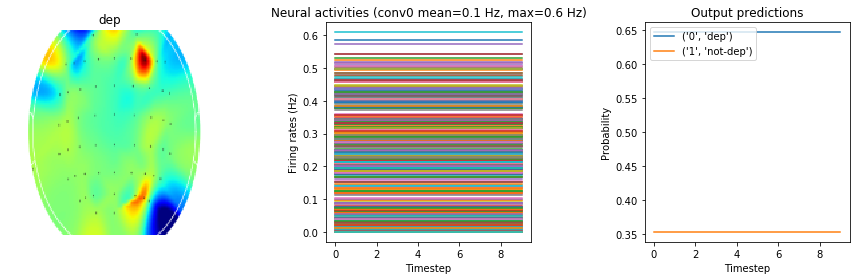

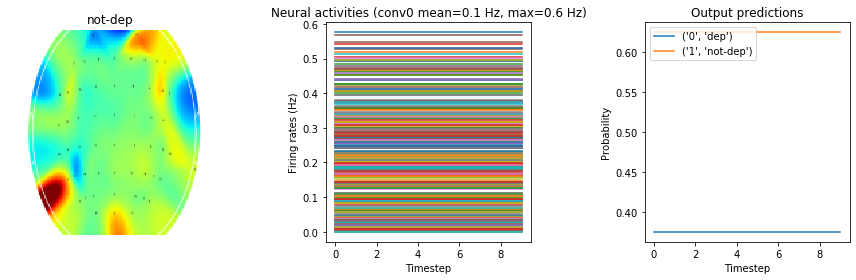

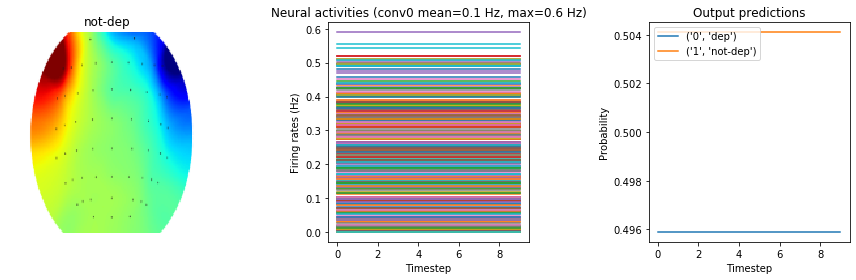

In [76]:
run_network(activation=nengo.RectifiedLinear(), n_steps=10)

Test accuracy: 46.77%


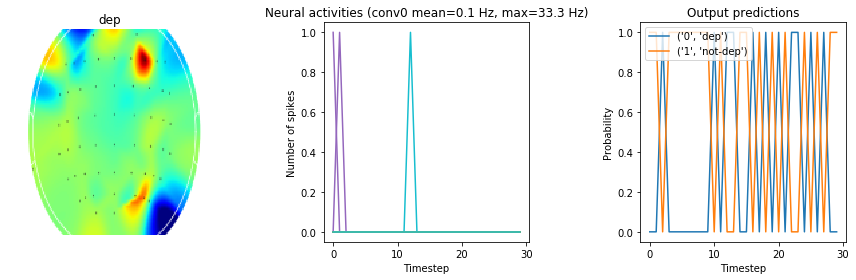

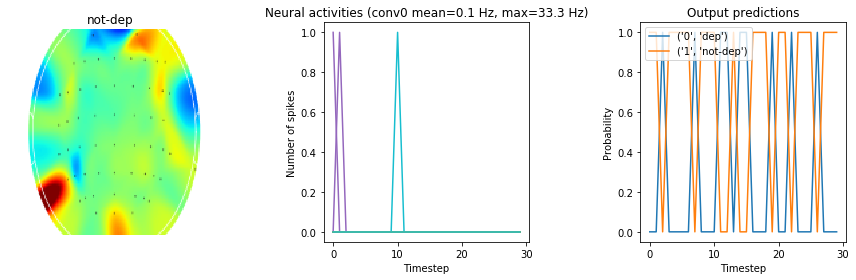

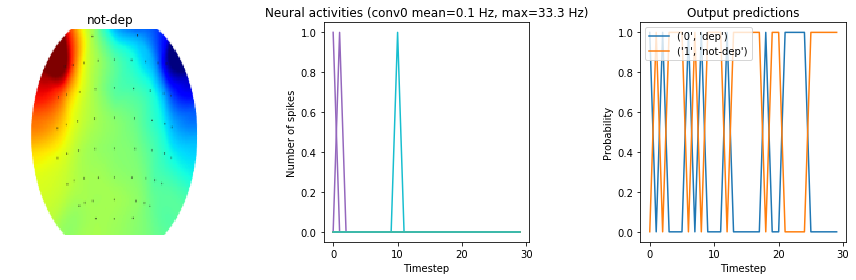

In [77]:
run_network(activation=nengo.SpikingRectifiedLinear())

Synapse=0.001
Test accuracy: 51.97%


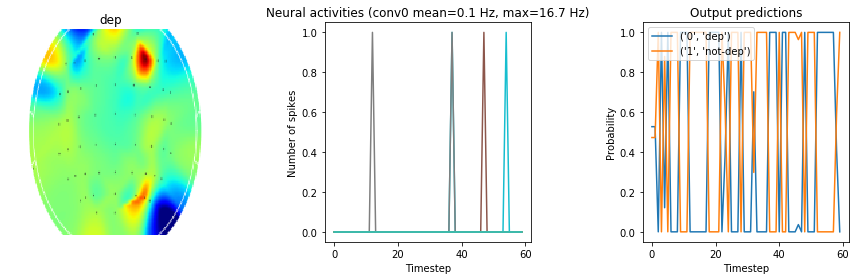

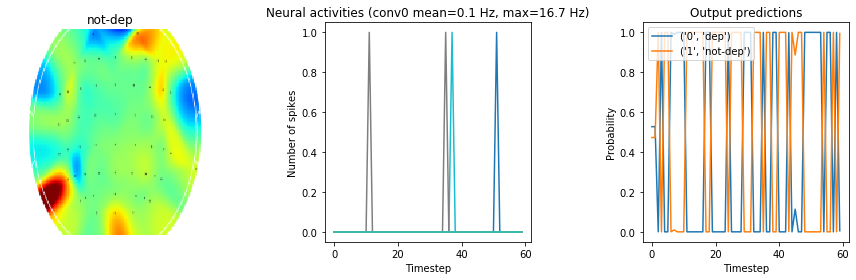

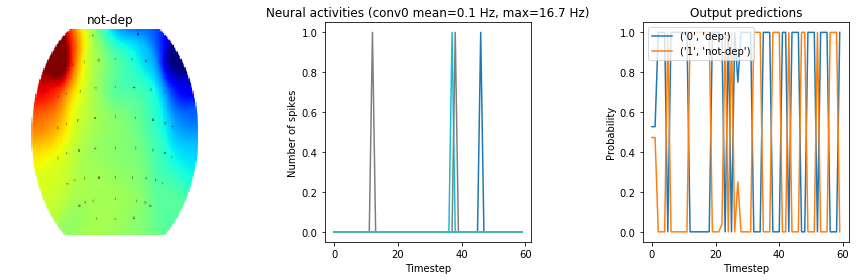

Synapse=0.005
Test accuracy: 41.56%


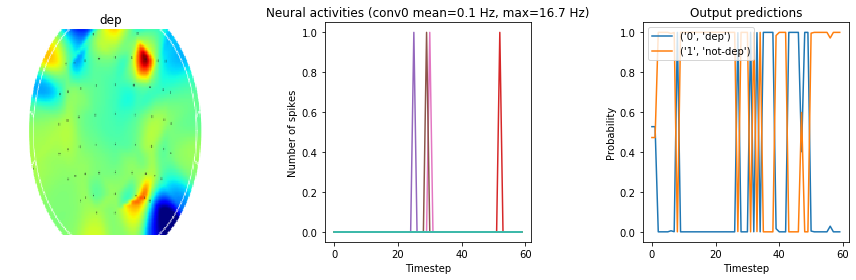

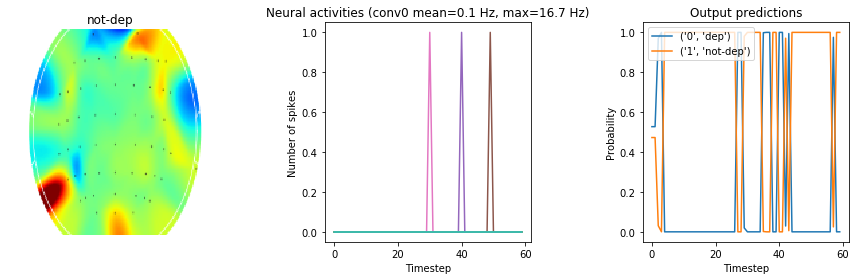

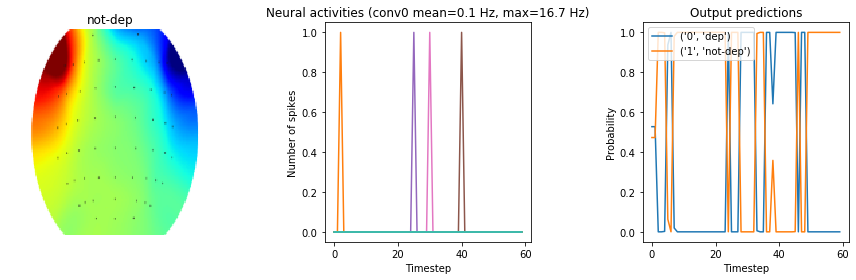

Synapse=0.010


In [ ]:
for s in [0.001, 0.005, 0.01]:
    print(f"Synapse={s:.3f}")
    run_network(
        activation=nengo.SpikingRectifiedLinear(),
        n_steps=60,
        synapse=s,
    )
    plt.show()


In [ ]:
for scale in [2, 5, 10]:
    print(f"Scale={scale}")
    run_network(
        activation=nengo.SpikingRectifiedLinear(),
        scale_firing_rates=scale,
        synapse=0.01,
    )
    plt.show()

In [ ]:
run_network(
    activation=nengo.SpikingRectifiedLinear(), scale_firing_rates=1000, n_steps=10
)


In [ ]:
#we'll encourage the neurons to spike at around 250Hz
target_rate = 250

# convert keras model to nengo network
converter = nengo_dl.Converter(model)

# add probes to the convolutional layers, which
# we'll use to apply the firing rate regularization
with converter.net:
    output_p = converter.outputs[dense]
    conv0_p = nengo.Probe(converter.layers[conv0])
    # conv1_p = nengo.Probe(converter.layers[conv1])

with nengo_dl.Simulator(converter.net, minibatch_size=50) as sim:
    # add regularization loss functions to the convolutional layers
    sim.compile(
        optimizer=tf.optimizers.RMSprop(0.001),
        loss={
            output_p: tf.losses.SparseCategoricalCrossentropy(from_logits=True),
            conv0_p: tf.losses.mse,
            # conv1_p: tf.losses.mse,
        },
        loss_weights={output_p: 1, conv0_p: 1e-3} #conv1_p: 1e-3},
    )

    do_training = True
    if do_training:
        # run training (specifying the target rates for the convolutional layers)
        sim.fit(
            {converter.inputs[inp]: x_train},
            {
                output_p: y_train,
                conv0_p: np.ones((y_train.shape[0], 1, conv0_p.size_in))
                * target_rate,
                # conv1_p: np.ones((train_labels.shape[0], 1, conv1_p.size_in))
                # * target_rate,
            },
            epochs=10,
        )

        # save the parameters to file
        sim.save_params("./keras_to_snn_regularized_params")
    else:
        # download pretrained weights
        urlretrieve(
            "https://drive.google.com/uc?export=download&"
            "id=1xvIIIQjiA4UM9Mg_4rq_ttBH3wIl0lJx",
            "keras_to_snn_regularized_params.npz",
        )
        print("Loaded pretrained weights")
